<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Perceptron</h2>
</div>

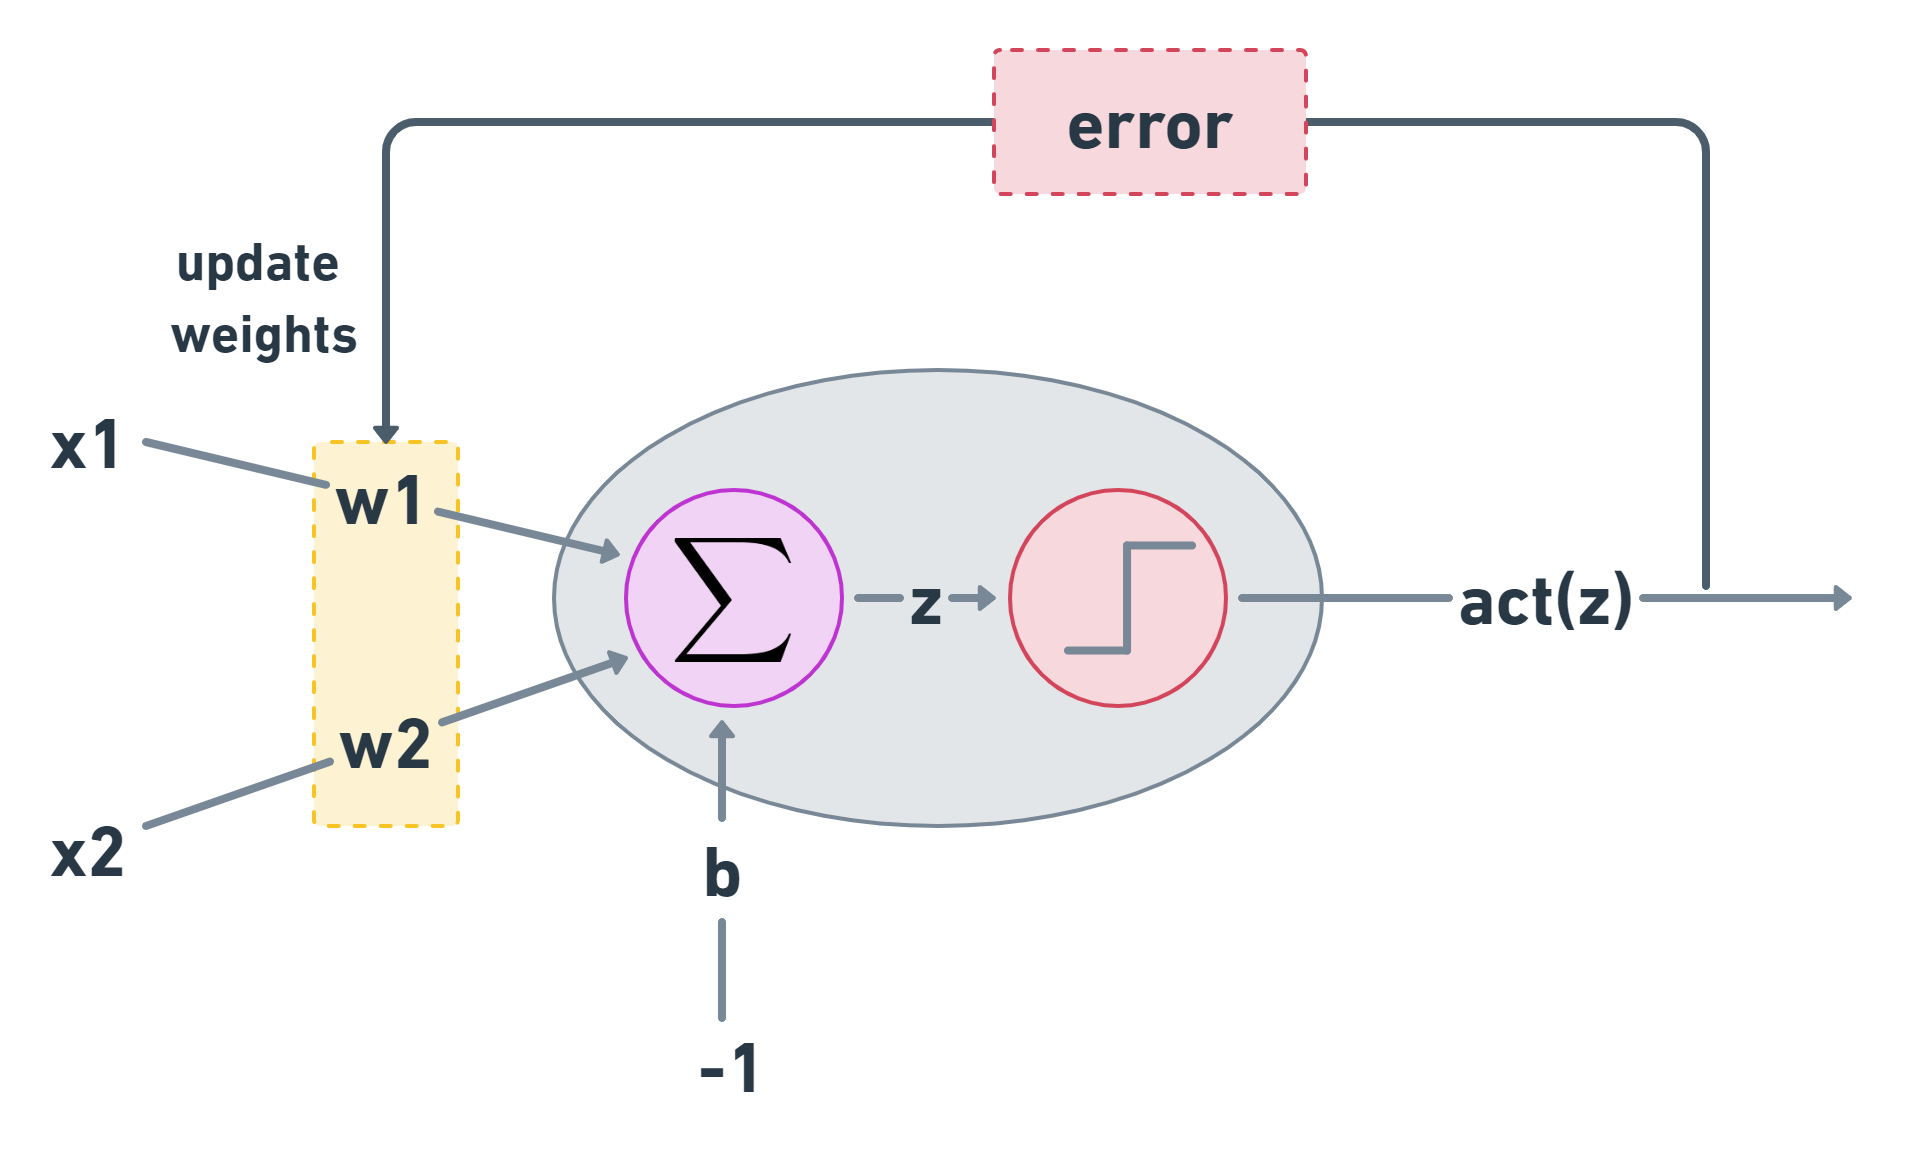

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib

from matplotlib.colors import ListedColormap
plt.style.use("fivethirtyeight")

In [2]:
class Perceptron:
    def __init__(self, eta: float = None, epochs: int = None):
        # small random weights
        self.weights = np.random.randn(3) * 1e-4
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"Initial Weights before training: \n{self.weights}")
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}") 
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch+1}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"Predicted values after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print("**"*30)
            print(f"Updated weights after epoch: {epoch+1}/{self.epochs}: \n{self.weights}")
            print("**"*30)
    
    def predict(self, X):   # X -> test inputs for prediction
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
    
    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
    
    def load(self, filepath):
        return joblib.load(filepath)

In [3]:
AND = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y" :[0,0,0,1]
}
df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [4]:
def prepare_data(df, target_col="y"):
    X = df.drop("y", axis=1)
    y = df["y"]
    return X,y

In [5]:
X, y = prepare_data(df_AND)
ETA = 0.1 # 0 and 1
EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X,y)
model_and.total_loss()

Initial Weights before training: 
[-1.08361732e-04  6.07170370e-05  5.24046105e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
Predicted values after forward pass: 
[0 1 0 0]
error: 
0    0
1   -1
2    0
3    1
Name: y, dtype: int64
************************************************************
Updated weights after epoch: 1/10: 
[9.98916383e-02 6.07170370e-05 5.24046105e-05]
************************************************************
--------------------
for epoch >> 2
--------------------
Predicted values after forward pass: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
************************************************************
Updated weights after epoch: 2/10: 
[-1.08361732e-04 -9.99392830e-02  2.00052405e-01]
************************************************************
--------------------
for epoch >> 3
--------------------
Predicted values after forward pass: 
[0 0 0 

In [6]:
model_and.save(filename="AND_PerceptronModel")
reload_model_and = Perceptron().load(filepath="model/AND_PerceptronModel")

In [7]:
reload_model_and.predict(X=[[1,1],[-2,-3]])

array([1, 0])

In [8]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)

df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [9]:
X, y = prepare_data(df_XOR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X, y)

_ = model_xor.total_loss()

Initial Weights before training: 
[ 1.15074953e-04 -2.13704569e-05 -7.40693623e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
Predicted values after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
************************************************************
Updated weights after epoch: 1/10: 
[-0.09988493 -0.10002137  0.19992593]
************************************************************
--------------------
for epoch >> 2
--------------------
Predicted values after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
************************************************************
Updated weights after epoch: 2/10: 
[ 1.15074953e-04 -2.13704569e-05 -7.40693623e-05]
************************************************************
--------------------
for epoch >> 3
--------------------
Predicted values after forward pass: 
[1 1 1 1]
error:

In [10]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        X = X.values   # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.plot()
    
    
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)
    

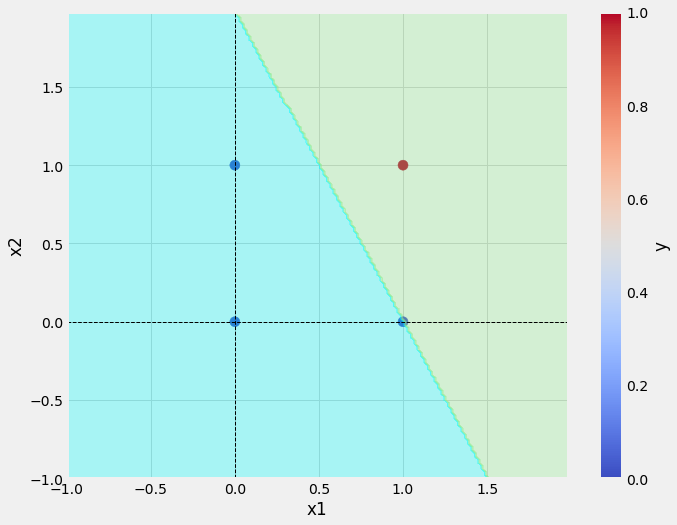

In [11]:
save_plot(df_AND, model_and, filename="AND_Plot.png")

In [12]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1]
}

df_OR = pd.DataFrame(OR)

df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [13]:
X, y = prepare_data(df_OR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X, y)

model_or.total_loss()

Initial Weights before training: 
[ 6.75918903e-05 -1.54133246e-04 -2.06274338e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
Predicted values after forward pass: 
[1 0 1 0]
error: 
0   -1
1    1
2    0
3    1
Name: y, dtype: int64
************************************************************
Updated weights after epoch: 1/10: 
[ 0.10006759  0.19984587 -0.10002063]
************************************************************
--------------------
for epoch >> 2
--------------------
Predicted values after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
************************************************************
Updated weights after epoch: 2/10: 
[ 1.00067592e-01  1.99845867e-01 -2.06274338e-05]
************************************************************
--------------------
for epoch >> 3
--------------------
Predicted values after forward pass: 
[1 1 1 1]
error:

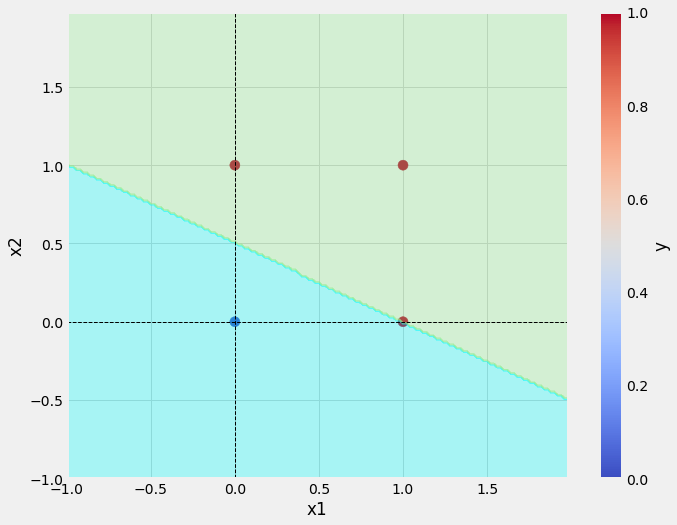

In [14]:
save_plot(df_OR, model_or, filename="or.png")

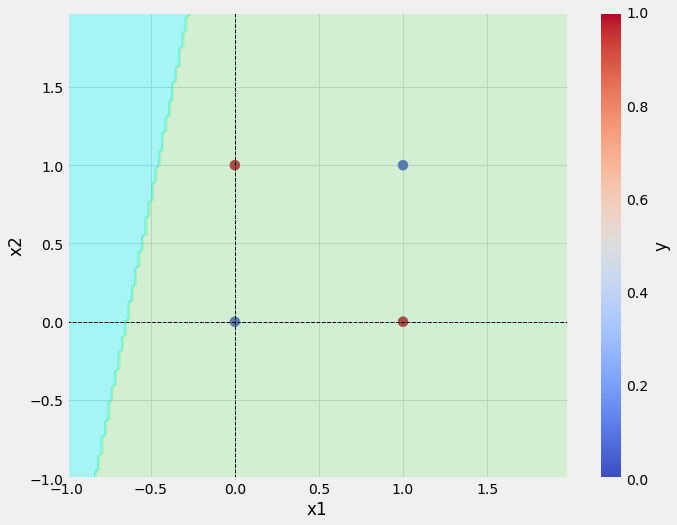

In [15]:
save_plot(df_XOR, model_xor, filename="XOR_Plot.png")

In [16]:
dfrand = pd.DataFrame()
np.random.seed(42)
dfrand['x1'] = np.random.randint(-10,20,100)
dfrand['x2'] = np.random.randint(-25,5,100)

In [17]:
# Create data points for line l = ax+by+c
y = []
a = -14
b = 3
c = 1
def datacreation():
    #line = a*x1 + b*x2 + c
    for i in dfrand.index:
        x1 = dfrand.iloc[i].values[0]
        x2 = dfrand.iloc[i].values[1]
        if (a*x1 + b*x2 + c) < 0:
            y.append(0)
            print('class 0:',a*x1 + b*x2 + c)
        else:
            y.append(1)
            print('class 1:',a*x1 + b*x2 + c)
    dfrand['y'] =  y

In [18]:
datacreation()

class 1: 9
class 0: -113
class 0: -317
class 0: -91
class 0: -29
class 1: 10
class 0: -305
class 0: -175
class 1: 48
class 0: -203
class 0: -114
class 0: -155
class 0: -53
class 0: -14
class 0: -211
class 0: -178
class 1: 75
class 1: 10
class 0: -196
class 1: 107
class 0: -153
class 0: -142
class 1: 133
class 0: -175
class 0: -7
class 0: -304
class 1: 20
class 1: 136
class 0: -270
class 0: -178
class 1: 66
class 0: -16
class 0: -266
class 0: -204
class 0: -257
class 0: -88
class 0: -237
class 0: -137
class 0: -229
class 0: -268
class 0: -6
class 0: -264
class 0: -291
class 0: -138
class 0: -124
class 0: -340
class 0: -262
class 0: -118
class 0: -313
class 0: -168
class 0: -13
class 0: -218
class 0: -119
class 0: -252
class 1: 62
class 1: 31
class 0: -153
class 0: -15
class 0: -214
class 0: -1
class 1: 48
class 0: -106
class 1: 111
class 0: -201
class 0: -300
class 0: -110
class 0: -139
class 0: -263
class 1: 17
class 0: -206
class 0: -208
class 1: 52
class 0: -194
class 0: -300
class 0

In [19]:
dfrand

,x1,x2,y
0,-4,-16,1
1,9,4,0
2,18,-22,0
3,4,-12,0
4,0,-10,0
...,...,...,...
95,18,3,0
96,7,-22,0
97,15,4,0
98,1,-21,0


In [20]:
X, y = prepare_data(dfrand)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_random_data = Perceptron(eta=ETA, epochs=EPOCHS)
model_random_data.fit(X, y)

model_random_data.total_loss()

Initial Weights before training: 
[8.72705098e-05 2.28722598e-04 1.62292050e-04]
X with bias: 
[[ -4. -16.  -1.]
 [  9.   4.  -1.]
 [ 18. -22.  -1.]
 [  4. -12.  -1.]
 [  0. -10.  -1.]
 [ -3. -11.  -1.]
 [ 18. -18.  -1.]
 [ 10. -12.  -1.]
 [ -4.  -3.  -1.]
 [ 15.   2.  -1.]
 [  8.  -1.  -1.]
 [ 12.   4.  -1.]
 [  0. -18.  -1.]
 [  0.  -5.  -1.]
 [ 13. -10.  -1.]
 [ 10. -13.  -1.]
 [ -7.  -8.  -1.]
 [ -3. -11.  -1.]
 [ 13.  -5.  -1.]
 [ -8.  -2.  -1.]
 [ 11.   0.  -1.]
 [ 10.  -1.  -1.]
 [ -9.   2.  -1.]
 [ 13.   2.  -1.]
 [  1.   2.  -1.]
 [ 19. -13.  -1.]
 [ -5. -17.  -1.]
 [ -9.   3.  -1.]
 [ 17. -11.  -1.]
 [ 10. -13.  -1.]
 [-10. -25.  -1.]
 [  1.  -1.  -1.]
 [ 15. -19.  -1.]
 [ 11. -17.  -1.]
 [ 18.  -2.  -1.]
 [  1. -25.  -1.]
 [ 14. -14.  -1.]
 [  6. -18.  -1.]
 [ 16.  -2.  -1.]
 [ 16. -15.  -1.]
 [ -1.  -7.  -1.]
 [ 17.  -9.  -1.]
 [ 17. -18.  -1.]
 [  5. -23.  -1.]
 [  4. -23.  -1.]
 [ 19. -25.  -1.]
 [ 19.   1.  -1.]
 [  4. -21.  -1.]
 [ 19. -16.  -1.]
 [  8. -19.  -1.]
 [  1

In [21]:
model_random_data.save(filename="RandomData_PerceptronModel")
reload_model_random_data = Perceptron().load(filepath="model/RandomData_PerceptronModel")

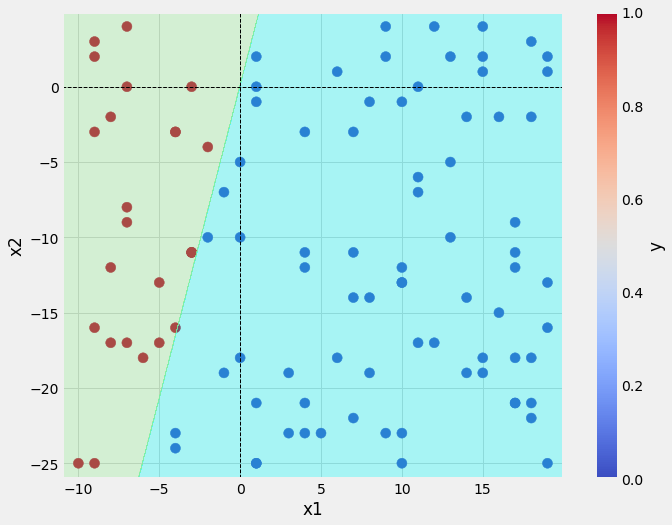

In [22]:
save_plot(dfrand, model_random_data, filename="RandomData_Plot.png")

Credits: https://nbviewer.org/github/c17hawke/PERCEPTRON-implementation/blob/main/Perceptron.ipynb